In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, metrics, ensemble, kernel_approximation
from sklearn.model_selection import train_test_split
import re

import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
l2clip = 5
clip = np.power(2,l2clip)
l2clip_birange = 2*l2clip+1

l2_arr_lb = np.arange(-l2clip,l2clip)
l2_arr_ub = l2_arr_lb + 1
clip_pow2_ub_lb = np.array([np.sign(l2_arr_lb)*np.power(2.0,np.abs(l2_arr_lb)), np.sign(l2_arr_ub)*np.power(2.0,np.abs(l2_arr_ub))]).T
clip_pow2_ub_lb = np.insert(clip_pow2_ub_lb, l2clip, [-1,1],axis=0)
clip_pow2_ub_lb[l2clip-1,1] = -1
clip_pow2_ub_lb[l2clip+1,0] = 1

feature_names = ['cm', 'cs', 'cx', 'fBB', 'fBK', 'fBN', 'fBP', 'fBQ', 'fBR', 'fBk', 'fBn', 'fBp', 'fBq', 'fBr', 'fKB', 'fKK', 'fKN', 'fKP', 'fKQ', 'fKR', 'fKb', 'fKn', 'fKp', 'fKq', 'fKr', 'fNB', 'fNK', 'fNN', 'fNP', 'fNQ', 'fNR', 'fNb', 'fNk', 'fNp', 'fNq', 'fNr', 'fPB', 'fPK', 'fPN', 'fPP', 'fPQ', 'fPR', 'fPb', 'fPk', 'fPn', 'fPq', 'fPr', 'fQB', 'fQK', 'fQN', 'fQP', 'fQQ', 'fQR', 'fQb', 'fQk', 'fQn', 'fQp', 'fQr', 'fRB', 'fRK', 'fRN', 'fRP', 'fRQ', 'fRR', 'fRb', 'fRk', 'fRn', 'fRp', 'fRq', 'kOO', 'kOOO', 'kOO_OOO', 'nfB', 'nfK', 'nfN', 'nfP', 'nfQ', 'nfR', 'nmB', 'nmK', 'nmN', 'nmP', 'nmQ', 'nmR', 'nrB', 'nrK', 'nrN', 'nrP', 'nrQ', 'nrR', 'nsB', 'nsK', 'nsN', 'nsP', 'nsQ', 'nsR', 'nvB', 'nvN', 'nvP', 'nvQ', 'nvR', 'nxB', 'nxK', 'nxN', 'nxP', 'nxQ', 'nxR', 'sA1B', 'sA1K', 'sA1N', 'sA1Q', 'sA1R', 'sA2B', 'sA2K', 'sA2N', 'sA2P', 'sA2Q', 'sA2R', 'sA3B', 'sA3K', 'sA3N', 'sA3P', 'sA3Q', 'sA3R', 'sA4B', 'sA4K', 'sA4N', 'sA4P', 'sA4Q', 'sA4R', 'sA5B', 'sA5K', 'sA5N', 'sA5P', 'sA5Q', 'sA5R', 'sA6B', 'sA6K', 'sA6N', 'sA6P', 'sA6Q', 'sA6R', 'sA7B', 'sA7K', 'sA7N', 'sA7P', 'sA7Q', 'sA7R', 'sA8B', 'sA8K', 'sA8N', 'sA8Q', 'sA8R', 'sB1B', 'sB1K', 'sB1N', 'sB1Q', 'sB1R', 'sB2B', 'sB2K', 'sB2N', 'sB2P', 'sB2Q', 'sB2R', 'sB3B', 'sB3K', 'sB3N', 'sB3P', 'sB3Q', 'sB3R', 'sB4B', 'sB4K', 'sB4N', 'sB4P', 'sB4Q', 'sB4R', 'sB5B', 'sB5K', 'sB5N', 'sB5P', 'sB5Q', 'sB5R', 'sB6B', 'sB6K', 'sB6N', 'sB6P', 'sB6Q', 'sB6R', 'sB7B', 'sB7K', 'sB7N', 'sB7P', 'sB7Q', 'sB7R', 'sB8B', 'sB8K', 'sB8N', 'sB8Q', 'sB8R', 'sC1B', 'sC1K', 'sC1N', 'sC1Q', 'sC1R', 'sC2B', 'sC2K', 'sC2N', 'sC2P', 'sC2Q', 'sC2R', 'sC3B', 'sC3K', 'sC3N', 'sC3P', 'sC3Q', 'sC3R', 'sC4B', 'sC4K', 'sC4N', 'sC4P', 'sC4Q', 'sC4R', 'sC5B', 'sC5K', 'sC5N', 'sC5P', 'sC5Q', 'sC5R', 'sC6B', 'sC6K', 'sC6N', 'sC6P', 'sC6Q', 'sC6R', 'sC7B', 'sC7K', 'sC7N', 'sC7P', 'sC7Q', 'sC7R', 'sC8B', 'sC8K', 'sC8N', 'sC8Q', 'sC8R', 'sD1B', 'sD1K', 'sD1N', 'sD1Q', 'sD1R', 'sD2B', 'sD2K', 'sD2N', 'sD2P', 'sD2Q', 'sD2R', 'sD3B', 'sD3K', 'sD3N', 'sD3P', 'sD3Q', 'sD3R', 'sD4B', 'sD4K', 'sD4N', 'sD4P', 'sD4Q', 'sD4R', 'sD5B', 'sD5K', 'sD5N', 'sD5P', 'sD5Q', 'sD5R', 'sD6B', 'sD6K', 'sD6N', 'sD6P', 'sD6Q', 'sD6R', 'sD7B', 'sD7K', 'sD7N', 'sD7P', 'sD7Q', 'sD7R', 'sD8B', 'sD8K', 'sD8N', 'sD8Q', 'sD8R', 'sE1B', 'sE1K', 'sE1N', 'sE1Q', 'sE1R', 'sE2B', 'sE2K', 'sE2N', 'sE2P', 'sE2Q', 'sE2R', 'sE3B', 'sE3K', 'sE3N', 'sE3P', 'sE3Q', 'sE3R', 'sE4B', 'sE4K', 'sE4N', 'sE4P', 'sE4Q', 'sE4R', 'sE5B', 'sE5K', 'sE5N', 'sE5P', 'sE5Q', 'sE5R', 'sE6B', 'sE6K', 'sE6N', 'sE6P', 'sE6Q', 'sE6R', 'sE7B', 'sE7K', 'sE7N', 'sE7P', 'sE7Q', 'sE7R', 'sE8B', 'sE8K', 'sE8N', 'sE8Q', 'sE8R', 'sF1B', 'sF1K', 'sF1N', 'sF1Q', 'sF1R', 'sF2B', 'sF2K', 'sF2N', 'sF2P', 'sF2Q', 'sF2R', 'sF3B', 'sF3K', 'sF3N', 'sF3P', 'sF3Q', 'sF3R', 'sF4B', 'sF4K', 'sF4N', 'sF4P', 'sF4Q', 'sF4R', 'sF5B', 'sF5K', 'sF5N', 'sF5P', 'sF5Q', 'sF5R', 'sF6B', 'sF6K', 'sF6N', 'sF6P', 'sF6Q', 'sF6R', 'sF7B', 'sF7K', 'sF7N', 'sF7P', 'sF7Q', 'sF7R', 'sF8B', 'sF8K', 'sF8N', 'sF8Q', 'sF8R', 'sG1B', 'sG1K', 'sG1N', 'sG1Q', 'sG1R', 'sG2B', 'sG2K', 'sG2N', 'sG2P', 'sG2Q', 'sG2R', 'sG3B', 'sG3K', 'sG3N', 'sG3P', 'sG3Q', 'sG3R', 'sG4B', 'sG4K', 'sG4N', 'sG4P', 'sG4Q', 'sG4R', 'sG5B', 'sG5K', 'sG5N', 'sG5P', 'sG5Q', 'sG5R', 'sG6B', 'sG6K', 'sG6N', 'sG6P', 'sG6Q', 'sG6R', 'sG7B', 'sG7K', 'sG7N', 'sG7P', 'sG7Q', 'sG7R', 'sG8B', 'sG8K', 'sG8N', 'sG8Q', 'sG8R', 'sH1B', 'sH1K', 'sH1N', 'sH1Q', 'sH1R', 'sH2B', 'sH2K', 'sH2N', 'sH2P', 'sH2Q', 'sH2R', 'sH3B', 'sH3K', 'sH3N', 'sH3P', 'sH3Q', 'sH3R', 'sH4B', 'sH4K', 'sH4N', 'sH4P', 'sH4Q', 'sH4R', 'sH5B', 'sH5K', 'sH5N', 'sH5P', 'sH5Q', 'sH5R', 'sH6B', 'sH6K', 'sH6N', 'sH6P', 'sH6Q', 'sH6R', 'sH7B', 'sH7K', 'sH7N', 'sH7P', 'sH7Q', 'sH7R', 'sH8B', 'sH8K', 'sH8N', 'sH8Q', 'sH8R', 'xBK', 'xBN', 'xBP', 'xBQ', 'xBR', 'xBk', 'xBn', 'xBp', 'xBq', 'xBr', 'xKB', 'xKN', 'xKP', 'xKQ', 'xKR', 'xKb', 'xKn', 'xKp', 'xKq', 'xKr', 'xNB', 'xNK', 'xNN', 'xNP', 'xNQ', 'xNR', 'xNb', 'xNk', 'xNn', 'xNp', 'xNq', 'xNr', 'xPB', 'xPK', 'xPN', 'xPP', 'xPQ', 'xPR', 'xPb', 'xPk', 'xPn', 'xPp', 'xPq', 'xPr', 'xQB', 'xQK', 'xQN', 'xQP', 'xQQ', 'xQR', 'xQb', 'xQk', 'xQn', 'xQp', 'xQq', 'xQr', 'xRB', 'xRK', 'xRN', 'xRP', 'xRQ', 'xRR', 'xRb', 'xRk', 'xRn', 'xRp', 'xRq', 'xRr']

In [52]:
def load_data():
    board_df = pd.read_pickle("../data/test/board.pkl")
    move_df = pd.read_pickle("../data/test/move.pkl")
    move_df.set_index(['id','mid'],inplace=True)
    move_df.sort_index(inplace=True)

    print('loaded data')
    features_df = pd.read_pickle("../data/test/features.pkl",compression='gzip')[feature_names]
    features_df.sort_index(inplace=True)
    features_df.fillna(0.0,inplace=True)
    print('loaded features')

    label_df = move_df.join(features_df,how='right')[['score','mate_in']].copy()
    score = label_df['score'].clip(-clip,clip).fillna(0.0).values
    label_df['score'] = score
    label_df['score_log2'] = np.sign(score)*np.log2(np.maximum(np.abs(score),1))
    print('loaded labels')

    x_data, y_data = prepare_data(features_df, label_df)
    print('prepared data')

    return x_data, y_data, features_df, label_df


def prepare_data(features_df, label_df):
    x_data = features_df.values
    #((features_df - features_df.mean())/features_df.std()).values
    y_data = label_df.clip(-clip,clip).fillna(0.0).values

    return x_data, y_data

In [81]:
wnpl = pd.read_csv('../../model/eval_weights.csv',index_col=[0],header=None).sort_index().values[:,0]
wnpl2 = pd.read_csv('../../model/eval_weights_l2.csv',index_col=[0],header=None).sort_index().values[:,0]
wnpl2c = pd.read_csv('../../model/eval_weights_l2c.csv',index_col=[0]).sort_index().values.T

In [53]:
x_data, y_data, features_df, label_df = load_data()
features_mean, features_std = features_df.mean(), features_df.std()
dims = x_data.shape[1]

loaded data
loaded features
loaded labels
prepared data


In [7]:
mask_res = ['[^s]','s']
masks = [np.array(list(map(lambda x: re.match('^'+mask_re,x)!=None,feature_names)))*1.0 for mask_re in mask_res]
# for mask in masks:
#     x_batch_mask = np.multiply(x_batch, mask)
#     sess.run(train_step, feed_dict={features: x_batch_mask, label: y_batch})
wtest = np.random.randn(543)*clip/200.0

In [82]:
n_iters = 100
batch_size = 10000
alpha = 0.005
epsilon = 0.02
C = 4000.0

In [83]:
def _parse_function(example_proto):
    keys_to_features = {'features'   :tf.FixedLenFeature([543],tf.float32),
                        'label':tf.FixedLenFeature([3],tf.float32)}
    parsed_features = tf.parse_single_example(example_proto, keys_to_features)
    return parsed_features['features'], parsed_features['label']

def get_dataset(data_path, n_iters, batch_size):
    ds = tf.data.TFRecordDataset(data_path,compression_type='GZIP')
    dataset = ds.map(_parse_function)
    batched_dataset = dataset.batch(batch_size).repeat(n_iters)
    iterator = batched_dataset.make_one_shot_iterator()
    return  batched_dataset,iterator
    
train_dataset, train_iterator = get_dataset("../data/train/features_full.tfr",n_iters, batch_size)
test_dataset, test_iterator = get_dataset("../data/test/features_full.tfr",n_iters, batch_size)

handle = tf.placeholder(tf.string, shape=[])
iterator = tf.data.Iterator.from_string_handle(handle, train_dataset.output_types, train_dataset.output_shapes)


features, label = iterator.get_next()
features = tf.to_double(features)
#features = tf.to_double(tf.div((features - features_mean.values),features_std.values))

label0 = tf.gather(label, 0, axis=1)
label0 = tf.clip_by_value(label0, -clip, clip)

label1 = tf.gather(label, 1, axis=1)

label2 = tf.gather(label, 2, axis=1)
label2 = tf.clip_by_value(label2, -l2clip, l2clip)

label = tf.to_double(tf.stack([label0,label1,label2], axis=1))

In [84]:
def predict(x, wt):
    return tf.tensordot(x, wt, axes=1)

def predictc(x, wt, wc):
    pred = predict(x, wt)
    #predp2 = tf.sign(pred)*tf.pow(tf.to_double(2.0),tf.abs(pred))
    yround =  tf.clip_by_value(tf.round(pred), -l2clip, l2clip)
        
    windex = tf.to_int32(yround + l2clip)
    clip_pow2_lb = tf.constant(clip_pow2_ub_lb[:,0], dtype=tf.float64)
    clip_pow2_ub = tf.constant(clip_pow2_ub_lb[:,1], dtype=tf.float64)
    wc_gathered = tf.gather(wc, windex, axis=0)
    clip_pow2_lb_gathered = tf.gather(clip_pow2_lb, windex, axis=0)
    clip_pow2_ub_gathered = tf.gather(clip_pow2_ub, windex, axis=0)
    
    y_pred = tf.reduce_sum(tf.multiply(wc_gathered, x),axis=1)# + predp2
    y_pred_clipped = tf.clip_by_value(y_pred, clip_pow2_lb_gathered,  clip_pow2_ub_gathered)
    return y_pred_clipped
    
def svr_wmat_loss(x, wt, y_true, loss_scale, epsilon, C, index):

    y_pred = tf.reduce_sum(tf.multiply(wt, x),axis=1)
    loss = C*tf.reduce_mean(tf.multiply(loss_scale,tf.maximum(tf.to_double(0.0) , tf.subtract(tf.abs(tf.subtract(y_pred, y_true[:,index])), epsilon*tf.abs(y_true[:,index])))))
    
    return loss

def svr_loss(x, wt, y_true, loss_scale, epsilon, C, index):

    y_pred = predict(x,wt)
    loss = C*tf.reduce_mean(tf.multiply(loss_scale,tf.maximum(tf.to_double(0.0) , tf.subtract(tf.abs(tf.subtract(y_pred, y_true[:,index:index])), epsilon*tf.abs(y_true[:,index:index])))))
    
    return loss

def svc_loss(x, wt, y_true, loss_scale, cutoff, C):

    y_pred = 2.0*tf.abs(predict(features, wt))/cutoff - 1.0
    loss = C*tf.reduce_mean(tf.multiply(loss_scale,tf.maximum(tf.to_double(0.0) , tf.ones_like(y_true) - tf.multiply(y_true, y_pred ))))
    return loss

def svc_sign_loss(x, wt, y_true, loss_scale, C):

    y_pred = tf.tanh(predict(x,wt))
    loss = C*tf.reduce_mean(tf.multiply(loss_scale,tf.maximum(tf.to_double(0.0) , tf.ones_like(y_true) - tf.multiply(y_true, y_pred ))))
    return loss


def root_mean_squared_error(x, wt, y_true, index):
    y_pred = predict(x,wt)
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_true[:,index]- y_pred)))
    return rmse

def root_mean_squared_error_p2(x, wt, y_true, index):
    y_pred = predict(x,wt)
    y_pred_p2 = tf.sign(y_pred)*tf.pow(tf.to_double(2.0),tf.abs(y_pred))
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_true[:,index]- y_pred_p2)))
    return rmse

def root_mean_squared_errorc(x, wt1, wt2, y_true, index):
    y_pred = predictc(x,wt1, wt2)
    rmse = tf.sqrt(tf.losses.mean_squared_error(y_true[:,index], y_pred))
    return rmse


def trainl2c(session, dims, wt, wc, alpha, epsilon_, C_):

    epsilon = tf.constant([epsilon_], name='epsilon_l2c', dtype=tf.float64)
    C = tf.constant([C_], name='C_l2c', dtype=tf.float64)
    
    unif_loss_scale = tf.ones_like(label[:,0], dtype=tf.float64)
    
    ## Child
    ytop =  tf.clip_by_value(tf.round(predict(features, wt)), -l2clip, l2clip) + l2clip
    windex = tf.to_int32(ytop)
    
    wc_gathered = tf.gather(wc, windex, axis=0)
        
    loss_scale2 = tf.maximum(tf.abs(label[:,2]),1.0)
    loss = svr_wmat_loss(features, wc_gathered, label, loss_scale2, epsilon,  C, 0)
    loss += tf.reduce_sum(tf.square(wc))
    
    rmse = root_mean_squared_errorc(features, wt, wc, label, 0)

    opt = tf.train.AdamOptimizer(alpha)
#     opt = tf.train.FtrlOptimizer(alpha, learning_rate_power=-0.45, l1_regularization_strength=0.0, l2_regularization_strength=0.0 )
    train_step = opt.minimize(loss)

    return train_step, loss, rmse
    
def trainl2(session, dims, w, alpha, epsilon_, C_):
    
    epsilon = tf.constant([epsilon_], name='epsilon_l2', dtype=tf.float64)
    C = tf.constant([C_], name='C_l2', dtype=tf.float64)
    
    unif_loss_scale = tf.ones_like(label[:,0], dtype=tf.float64)
    loss_scale0 = tf.to_double(tf.equal(label[:,1],0.0))
    loss_scale2 = tf.maximum(tf.abs(label[:,2]),1.0)

    loss = svr_loss(features, w, label, loss_scale0, epsilon, C*0.5, 2)
    
    loss += svr_loss(features, w, label, loss_scale2, epsilon, C*0.1, 2)

    y_targetc = (2*tf.to_double(tf.not_equal(label[:,1],0.0)) - 1.0)
    loss += svc_loss(features, w, y_targetc, loss_scale2, l2clip, C*0.15)

    labelc = tf.sign(label[:,2])
    loss += svc_sign_loss(features, w, labelc, loss_scale2, C*0.25)
    
    
    loss += tf.reduce_sum(tf.square(w))
    
    rmse = root_mean_squared_error_p2(features, w, label, 2)

    opt = tf.train.AdamOptimizer(alpha)
#     opt = tf.train.FtrlOptimizer(alpha, learning_rate_power=-0.45, l1_regularization_strength=0.0, l2_regularization_strength=0.0 )
    train_step = opt.minimize(loss)

    return train_step, loss, rmse


def train(session, dims, w, alpha, epsilon_, C_):
    
    epsilon = tf.constant([epsilon_], name='epsilon', dtype=tf.float64)
    C = tf.constant([C_], name='C',  dtype=tf.float64)
    
    unif_loss_scale = tf.ones_like(label[:,0], dtype=tf.float64)
    loss_scale0 = tf.to_double(tf.equal(label[:,1],0.0))
    loss_scale2 = tf.maximum(tf.abs(label[:,2]),1.0)
    
    loss = svr_loss(features, w, label, loss_scale0, epsilon, C*0.5, 0)
    
    loss += svr_loss(features, w, label, loss_scale2, epsilon, C*0.1, 0)
    
    y_targetc = (2*tf.to_double(tf.not_equal(label[:,1],0.0)) - 1.0)
    loss += svc_loss(features, w, y_targetc, loss_scale2, clip, C*0.15)

    labelc = tf.sign(label[:,0])
    loss += svc_sign_loss(features, w, labelc, loss_scale2, C*0.25)
    
    loss += tf.reduce_sum(tf.square(w))
    rmse = root_mean_squared_error(features, w, label, 0)

    opt = tf.train.AdamOptimizer(alpha)
#     opt = tf.train.FtrlOptimizer(alpha, learning_rate_power=-0.45, l1_regularization_strength=0.0, l2_regularization_strength=0.0 )
    train_step = opt.minimize(loss)

    return train_step, loss, rmse

In [85]:
try:
    wl = tf.Variable(wnpl, name='wl', dtype=tf.float64)
    wl2 = tf.Variable(wnpl2, name='wl2', dtype=tf.float64)
    wl2c = tf.Variable(wnpl2c, name='wl2c', dtype=tf.float64)        
except :
    print('random initing')
    wl = tf.Variable(tf.random_normal(shape=[dims],mean=0.0,stddev=0.1,dtype=tf.float64),name='wl', dtype=tf.float64)
    wl2 = tf.Variable(tf.random_normal(shape=[dims],mean=0.0,stddev=0.1,dtype=tf.float64),name='wl2', dtype=tf.float64)
    wl2c = tf.Variable(tf.random_normal(shape=[l2clip_birange, dims],mean=0.0,stddev=0.03,dtype=tf.float64),name='wl2c', dtype=tf.float64)

In [86]:
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session(config=config)

In [87]:
train_step, loss, rmse = train(sess, dims, wl, alpha, epsilon, C)
train_step_l2, loss_l2, rmse_l2 = trainl2(sess, dims, wl2, alpha, epsilon, C)
train_step_l2c, loss_l2c, rmse_l2c = trainl2c(sess, dims, wl2, wl2c, alpha, epsilon, C)

wnorm = tf.norm(wl)
wl2norm = tf.norm(wl2)
wl2cnorm = tf.norm(wl2c)

gnorm = tf.norm(tf.gradients(loss,wl), name='gnorm')
gl2norm = tf.norm(tf.gradients(loss_l2,wl2),name='gl2norm')
gl2cnorm = tf.norm(tf.gradients(loss_l2c,[wl2,wl2c])[1],name='gl2cnorm')

In [88]:
# Create graph
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
metrics_mat = np.ndarray((n_iters*10,12))
metrics_label = ["loss", "error", "wnorm", "gnorm", 
               "l2_loss", "l2_error", "l2_wnorm", "l2_gnorm", 
               "l2c_loss", "l2c_error", "l2c_wnorm", "l2c_gnorm", ]

ind = 0
train_handle, test_handle = sess.run([train_iterator.string_handle(),test_iterator.string_handle()])
# Training loop        
while True:
    try:
                
        sess.run([train_step, train_step_l2, train_step_l2c, features, label], feed_dict={handle: train_handle})
        

        if ind%100==0:
            mindex = ind//100
            
            metrics_mat[mindex,:]  = sess.run([loss, rmse, wnorm, gnorm, loss_l2, rmse_l2, wl2norm, gl2norm, loss_l2c, rmse_l2c, wl2cnorm, gl2cnorm], feed_dict={handle: test_handle})        
            metstr = str(dict(zip(metrics_label,np.round(metrics_mat[mindex,:],2))))
            print(str(mindex)+". "+metstr.replace("'","").replace(",","")[1:-1])
        
        ind+=1

    except tf.errors.OutOfRangeError:
        break        

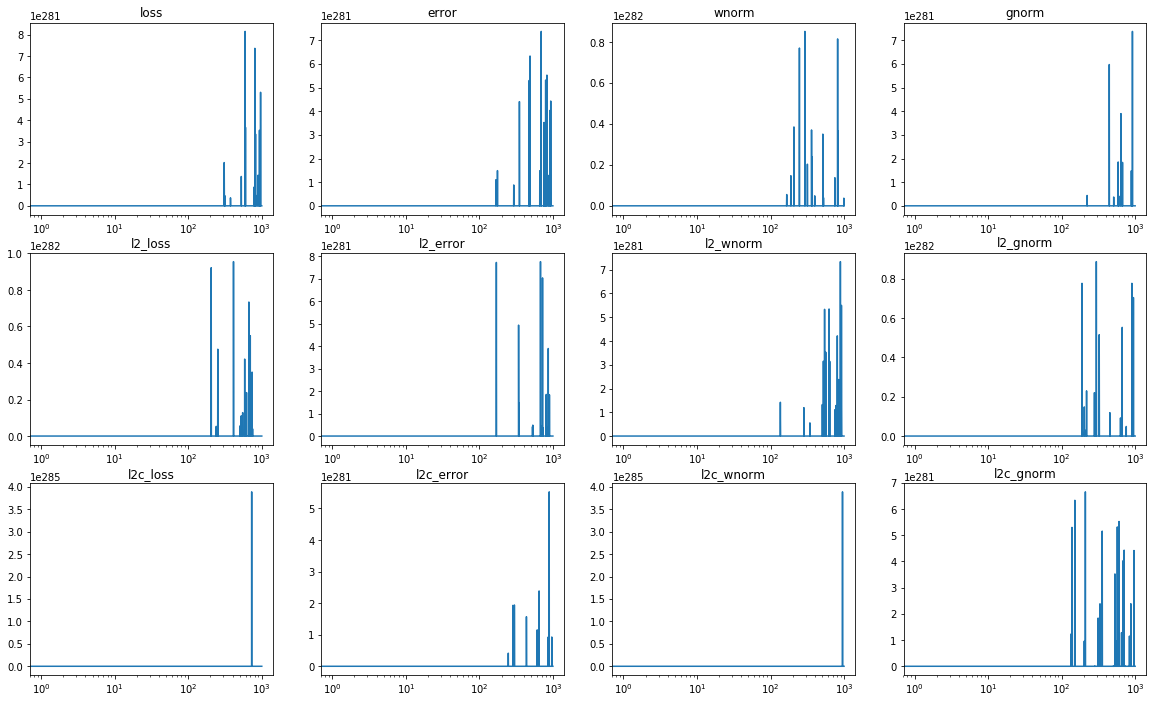

In [90]:
fig, axes = plt.subplots(3,4, figsize=(20,12))
for i in range(12):
    ax = axes[i//4,i%4]
    ax.plot(metrics_mat[:,i])
    ax.set_title(metrics_label[i])    
    ax.set_xscale('log')

In [91]:
wnpl, wnpl2, wnpl2c = sess.run([wl,wl2,wl2c])
wnprnd = np.random.randn(dims)

In [92]:
def predict_np(x, w):
    return np.dot(x, w)

def predictc_np(x, w1, wc):    
    predl1 = np.dot(x, w1)
    windex = (np.clip(np.round(predl1), -l2clip, l2clip) + l2clip).astype(np.int32)
    predl1_l = clip_pow2_ub_lb[windex,0]
    predl1_u = clip_pow2_ub_lb[windex,1]
    
    wgather = wc[windex,:]
#    predp2 = np.sign(predl1)*np.power(2.0,np.abs(predl1))
    pred = np.sum(np.multiply(x,wgather),axis=1)# + predp2
    pred = np.clip(pred, predl1_l, predl1_u) 
    return pred

def cumdistplot(vec, ax):
    ax.hist(vec, bins=100, density=True, log=False, cumulative=True, fill=False,histtype='step')
    ax.twinx().hist(vec, bins=100, density=True, log=True, cumulative=False, fill=False,histtype='bar')
    

ypred_data = predict_np(x_data,wnpl)
ypred_l2_data = predict_np(x_data,wnpl2)
ypred_l2c_data = predictc_np(x_data,wnpl2, wnpl2c)

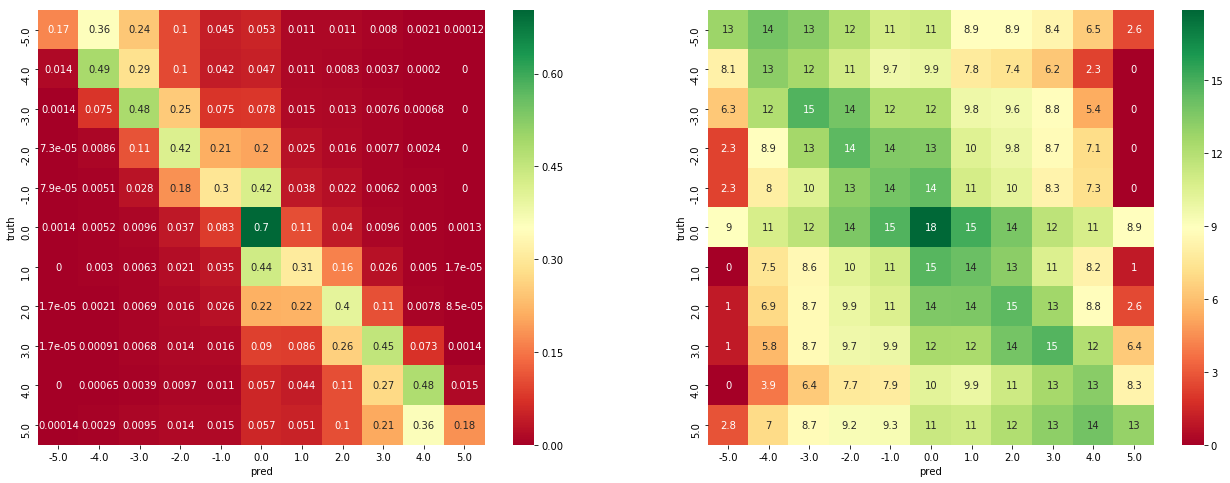

In [93]:
predl2 = np.clip(np.round(np.sign(ypred_data)*np.log2(np.maximum(np.abs(ypred_data),1))),-l2clip,l2clip)
yl2 = np.round(y_data[:,2])
l2_conf_mat = pd.crosstab(yl2, predl2, rownames=['truth'],colnames=['pred'])
l2_conf_mat_norm = l2_conf_mat.T.div(l2_conf_mat.sum(axis=1).astype(np.float32)).T
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.heatmap(l2_conf_mat_norm,ax=ax[0],annot=True, cmap="RdYlGn")
sns.heatmap(np.log2(l2_conf_mat+1),ax=ax[1],annot=True, cmap="RdYlGn")

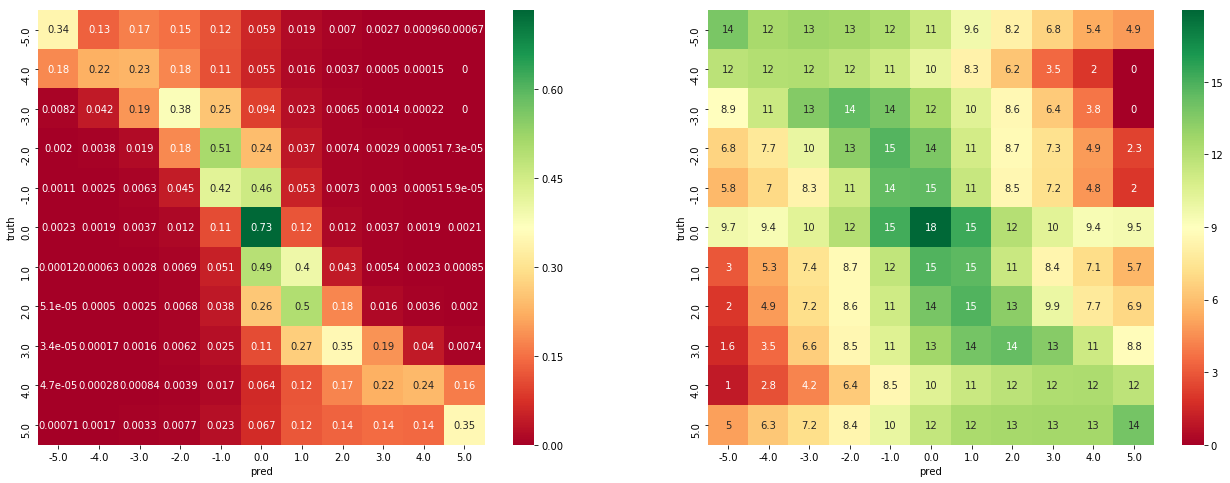

In [94]:
predl2 =  np.clip(np.round(np.dot(x_data,wnpl2)),-l2clip,l2clip) #np.round(np.sign(np.dot(x_test,wnp))*np.log2(np.maximum(np.abs(np.dot(x_test,wnp)),1)))
yl2 = np.round(y_data[:,2])
l2_conf_mat = pd.crosstab(yl2, predl2, rownames=['truth'],colnames=['pred'])
l2_conf_mat_norm = l2_conf_mat.T.div(l2_conf_mat.sum(axis=1).astype(np.float32)).T
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.heatmap(l2_conf_mat_norm,ax=ax[0],annot=True, cmap="RdYlGn")
sns.heatmap(np.log2(l2_conf_mat+1),ax=ax[1],annot=True, cmap="RdYlGn")

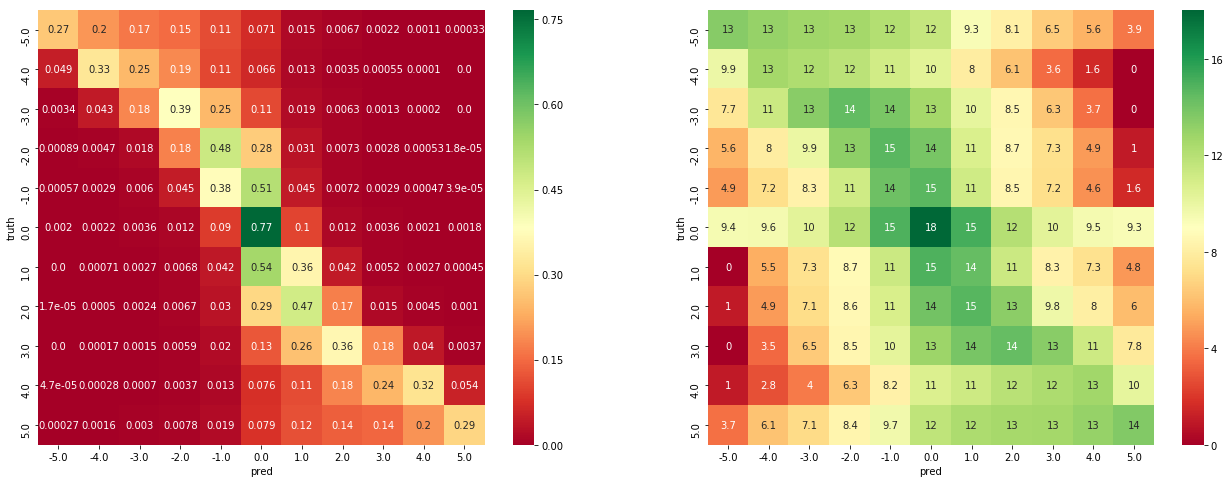

In [95]:
predl2 = np.clip(np.round(np.sign(ypred_l2c_data)*np.log2(np.maximum(np.abs(ypred_l2c_data),1))),-l2clip,l2clip)
yl2 = np.round(y_data[:,2])
l2_conf_mat = pd.crosstab(yl2, predl2, rownames=['truth'],colnames=['pred'])
l2_conf_mat_norm = l2_conf_mat.T.div(l2_conf_mat.sum(axis=1).astype(np.float32)).T
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.heatmap(l2_conf_mat_norm,ax=ax[0],annot=True,fmt='.2', cmap="RdYlGn")
sns.heatmap(np.log2(l2_conf_mat+1),ax=ax[1],annot=True, cmap="RdYlGn")

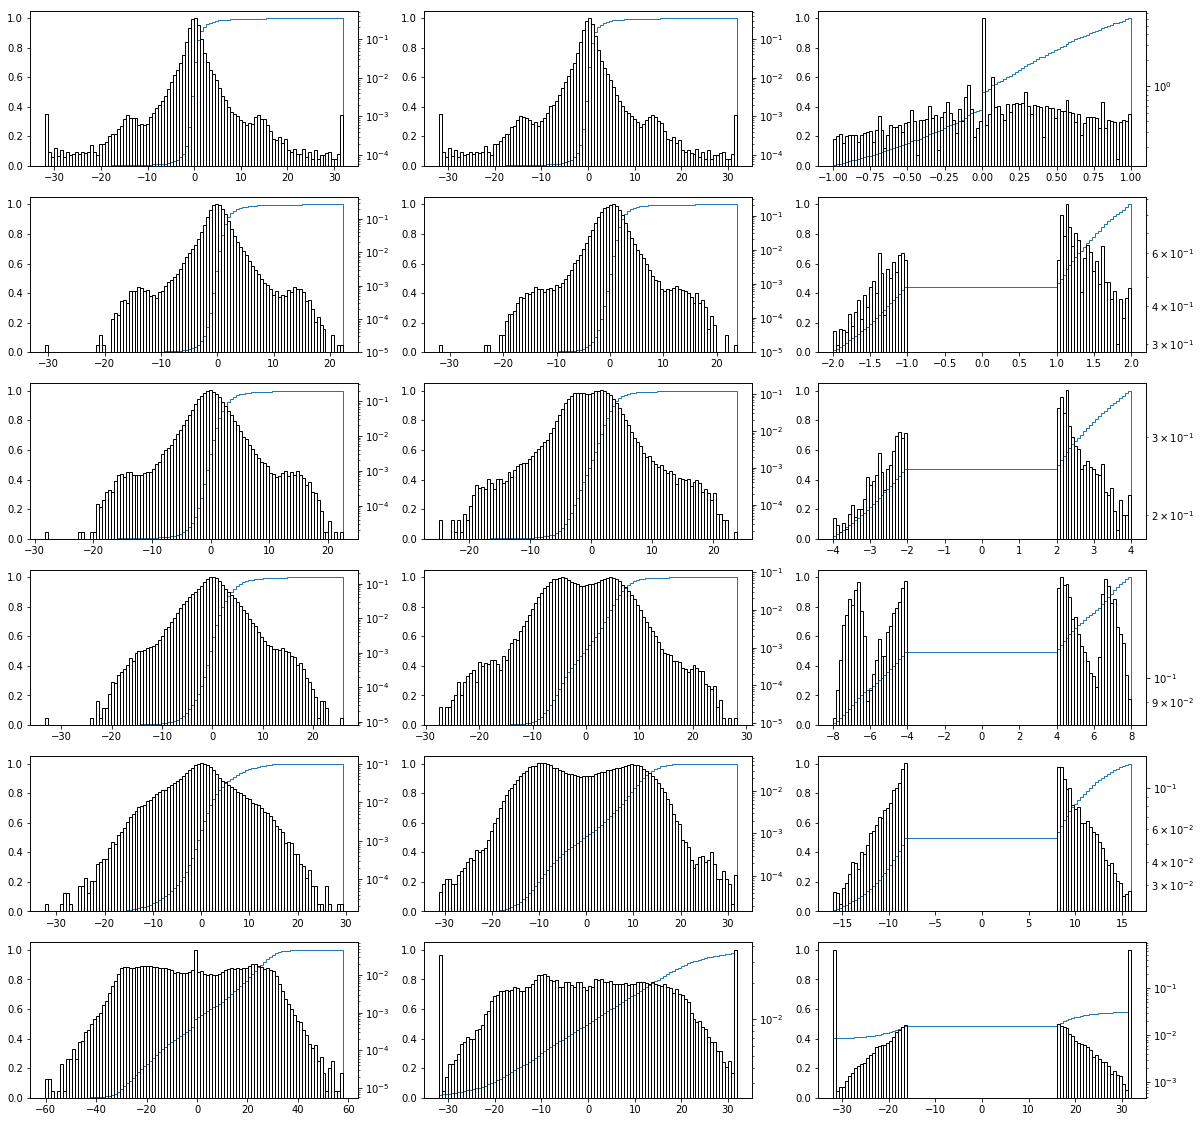

In [96]:
fig, axes = plt.subplots(6, 3, figsize=(20,20))
for index in range(6):
    mask = np.ceil(np.abs(y_data[:,2])) == index
    pred = np.dot(x_data[mask,:],wnpl)
    pred = np.clip(pred, -clip, clip)
    
    truth =  y_data[mask,0]
    err = pred - truth
    cumdistplot(err, axes[index][0])
    cumdistplot(pred, axes[index][1])
    cumdistplot(truth, axes[index][2])
    
a0=1

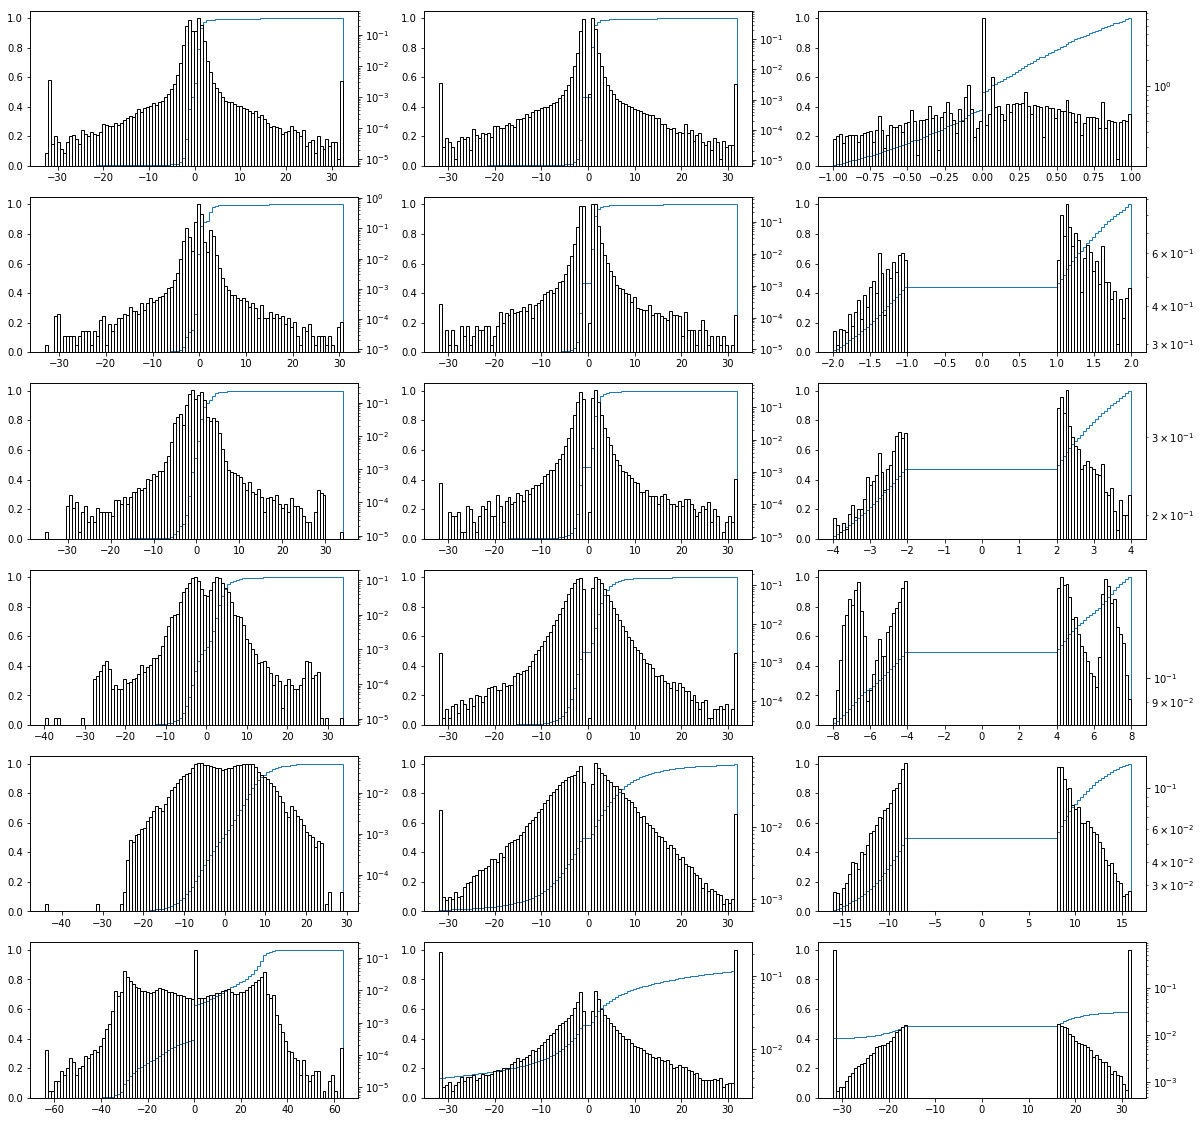

In [97]:
fig, axes = plt.subplots(6, 3, figsize=(20,20))
for index in range(6):
    mask = np.ceil(np.abs(y_data[:,2])) == index
    
    pred = np.clip(np.dot(x_data[mask,:],wnpl2), -l2clip, l2clip)
    pred = np.sign(pred)*np.power(2,np.abs(pred))

    truth =  y_data[mask,0]
    err = pred - truth
    cumdistplot(err, axes[index][0])
    cumdistplot(pred, axes[index][1])
    cumdistplot(truth, axes[index][2])
    
a0=1

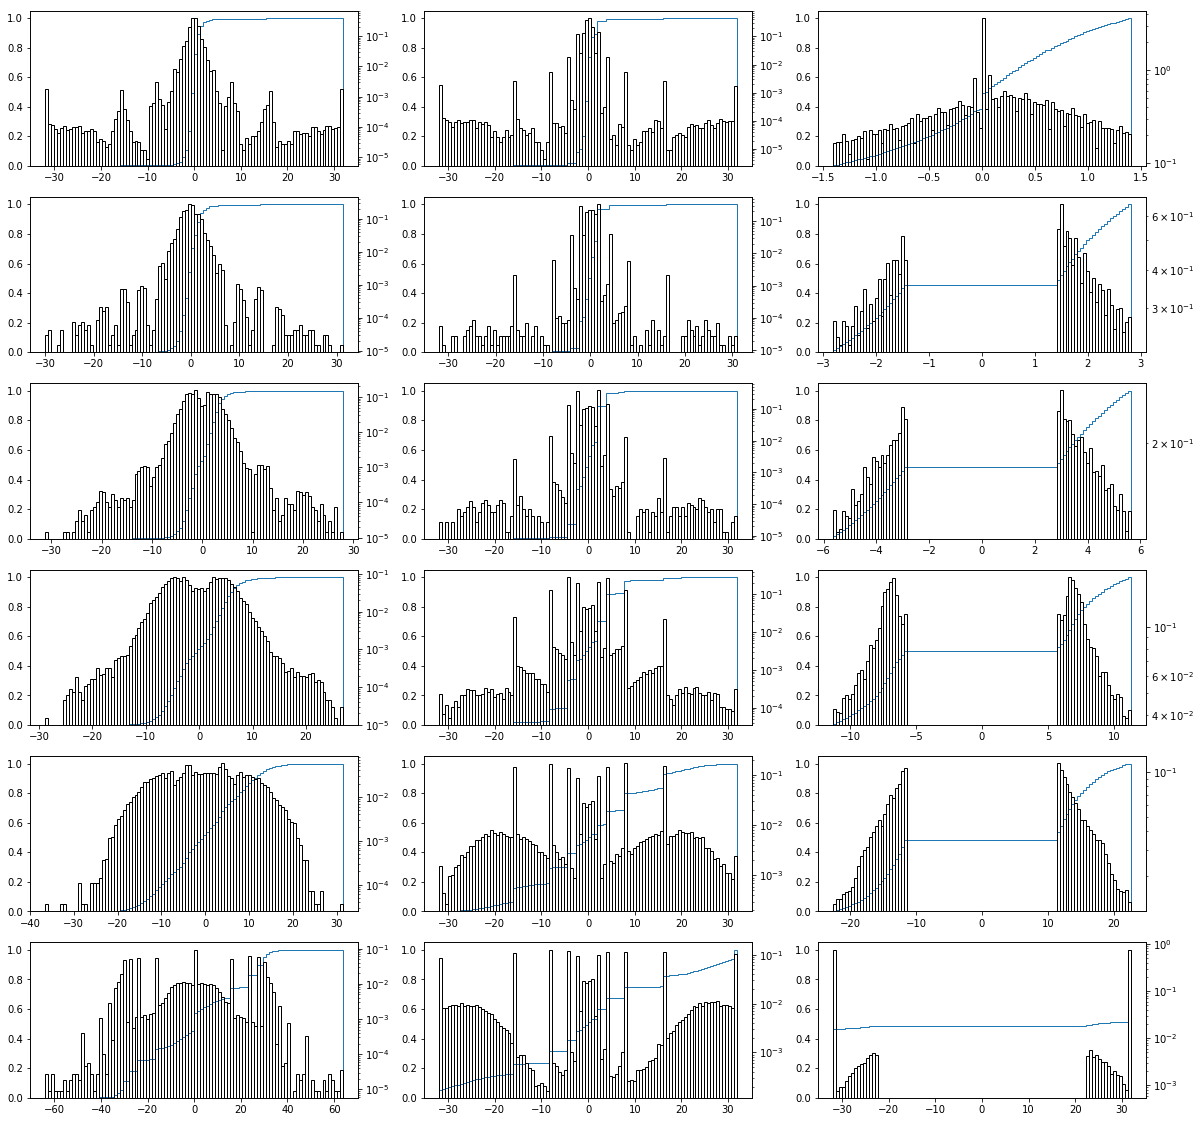

In [98]:
fig, axes = plt.subplots(6, 3, figsize=(20,20))
for index in range(6):
    mask = np.round(np.abs(y_data[:,2])) == index
    pred = predictc_np(x_data[mask,:],wnpl2, wnpl2c)
    pred = np.clip(pred, -clip, clip)
    
    truth =  y_data[mask,0]
    err = pred - truth
    cumdistplot(err, axes[index][0])
    cumdistplot(pred, axes[index][1])
    cumdistplot(truth, axes[index][2])
    
a0=1

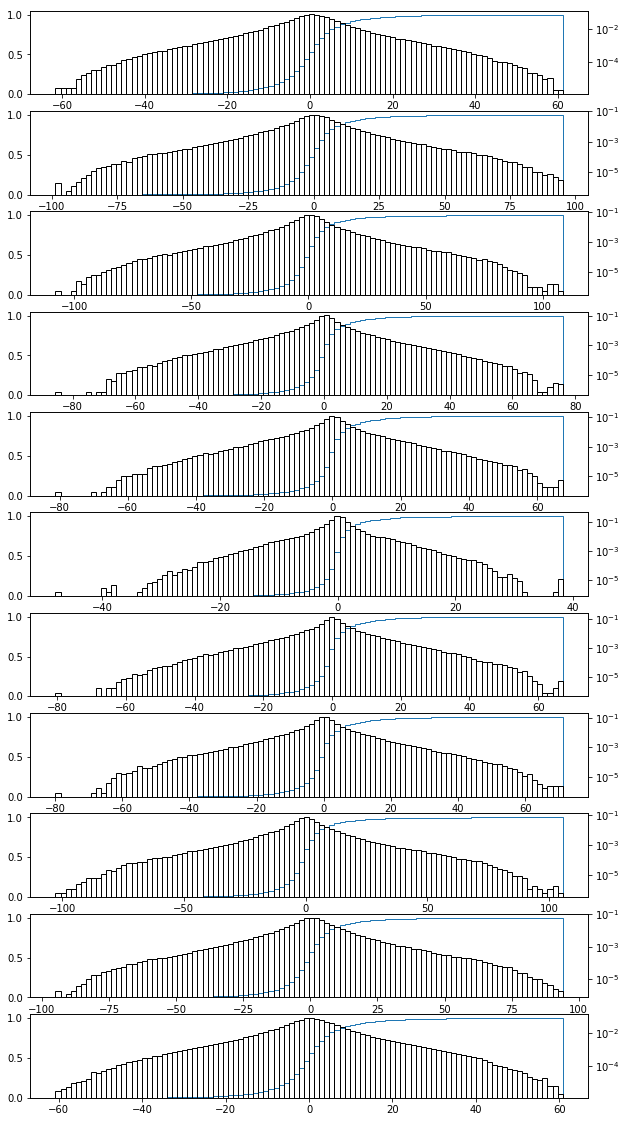

In [64]:
predc = np.dot(x_data,wnpl2c.T)
fig, ax = plt.subplots(l2clip_birange, figsize=(10,20))
for ind in range(l2clip_birange):
    cumdistplot(predc[:,ind], ax[ind])

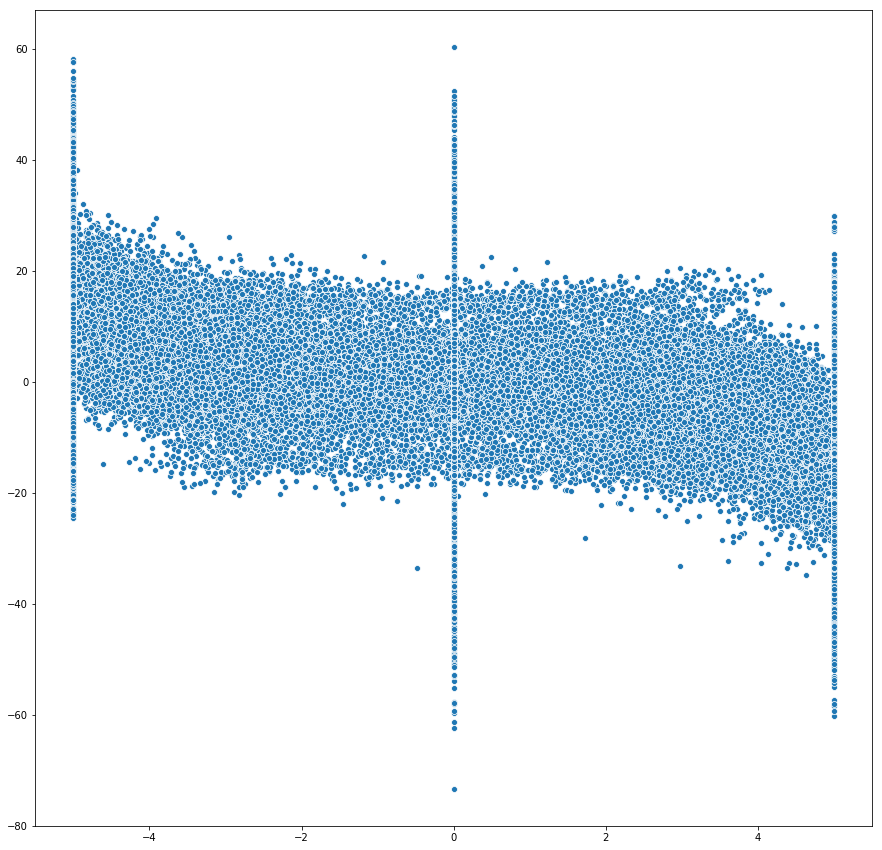

In [99]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(y_data[:,2],predict_np(x_data[:,:],wnpl) - y_data[:,0], ax=ax)
#sns.jointplot(y_train[not_mate_train,2],np.dot(x_train[not_mate_train,:],wnp) - y_train[not_mate_train,0], size=10, kind='hex')

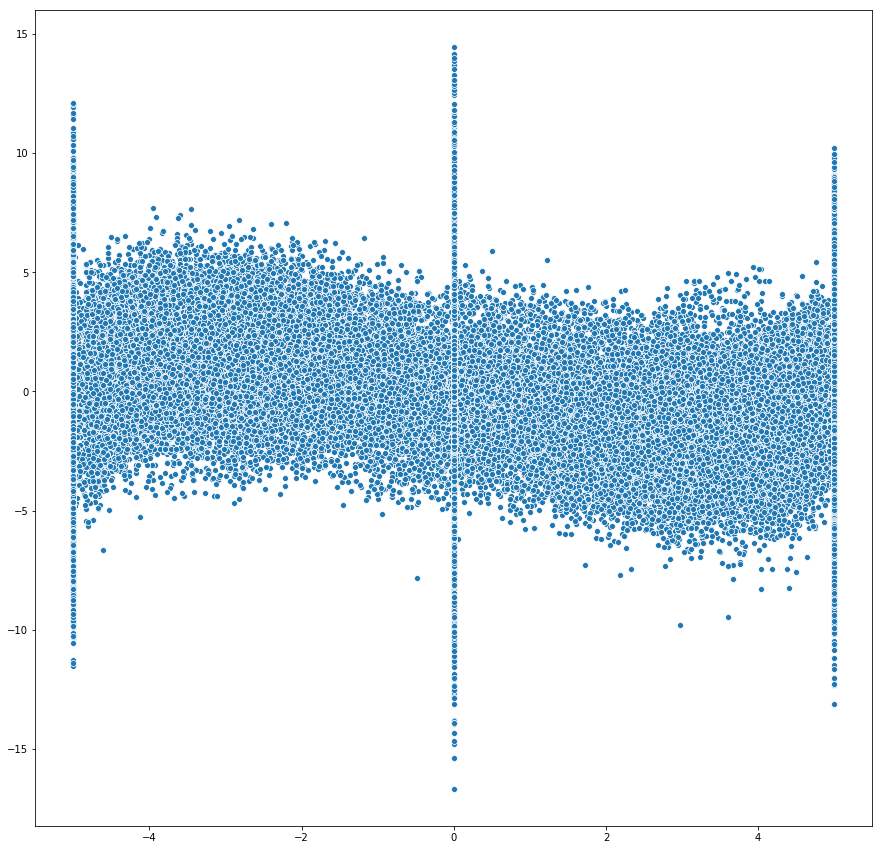

In [100]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(y_data[:,2],predict_np(x_data,wnpl2) - y_data[:,2], ax=ax)

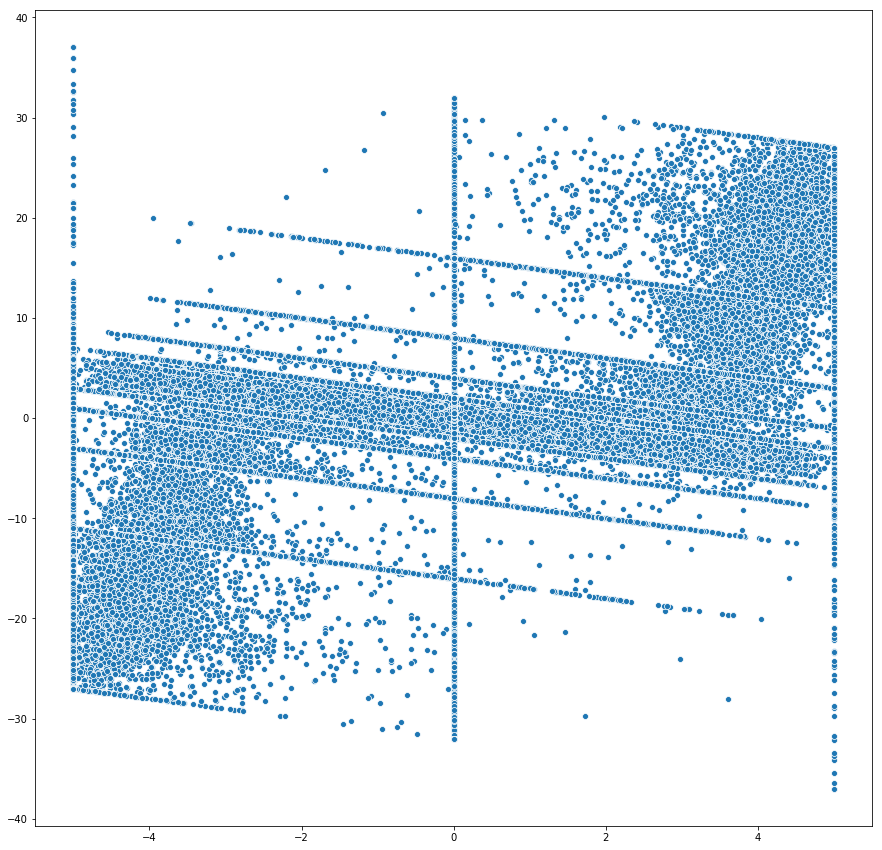

In [101]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(y_data[:,2],predictc_np(x_data,wnpl2,wnpl2c) - y_data[:,2], ax=ax)

In [102]:
wdf = pd.Series(wnpl, index=feature_names).sort_values()
wdf.name = 'w'
wdf.to_csv('../../model/eval_weights.csv')

wl2df = pd.Series(wnpl2, index=feature_names).sort_values()
wl2df.name = 'wl2'
wl2df.to_csv('../../model/eval_weights_l2.csv')

wl2cdf = pd.DataFrame(wnpl2c.T, index=feature_names, columns=range(-l2clip,l2clip+1)).sort_index()
wl2cdf.name = 'wl2c'
wl2cdf.to_csv('../../model/eval_weights_l2c.csv')

In [103]:
def reg_coef_table(regw, transpose=False):
    features_freq_df = features_df.abs().sum(axis=0)
    features_freq_df.name = 'f'

    fj_df = pd.DataFrame([features_freq_df,regw]).T
    fj_df.columns = ['f','w']
    fj_df['fw'] = fj_df['f']*fj_df['w']

    return fj_df

def reg_coef_sqtable(fj_df):
    fj_dfs = fj_df.filter(regex='^[s]',axis=0).sort_values(by='f')
    fj_dfs_spl = pd.DataFrame(fj_dfs.index.map(lambda x: list(x)[1:]).values.tolist(),columns=['C','R','P'],index=fj_dfs.index).copy()
    fj_dfs_spl['C'] = fj_dfs_spl['C'].apply(lambda x: "ABCDEFGH".find(x)+1)
    fj_dfsj = fj_dfs_spl.join(fj_dfs)
    return fj_dfsj

def reg_coef_xtable(fj_df,pref='x'):
    fj_dfs = fj_df.filter(regex='^['+pref+']',axis=0).sort_values(by='f')
    fj_dfs_spl = pd.DataFrame(fj_dfs.index.map(lambda x: list(x)[1:]).values.tolist(),columns=['P1','P2'],index=fj_dfs.index).copy()
    fj_dfsj = fj_dfs_spl.join(fj_dfs)
    return fj_dfsj

In [104]:
regw_df = reg_coef_table(wdf)
regw_sq_df = reg_coef_sqtable(regw_df)
regwl2_df = reg_coef_table(wl2df)
regwl2_sq_df = reg_coef_sqtable(regwl2_df)

In [105]:
def piece_sq_heatmap(data, column, title,log=False):
    grpd = data.groupby('P').apply(lambda grp: pd.crosstab(grp['C'],grp['R'],grp[column],aggfunc=np.mean)).reset_index().set_index('P').groupby('P')
    ngrpd = len(grpd)    
    fig, axes = plt.subplots(ngrpd//3,3,figsize=(14,8))
    plt.suptitle(title)    
    for i, (n,grp1) in enumerate(grpd):
        ax = axes[i//3][i%3]
        mat = grp1.iloc[:,1:9].fillna(0.0).T
        mat = np.log(mat+1) if log else mat
        sns.heatmap(mat, 
                    ax=ax, cmap="seismic", cbar=False, linewidths=0.5, xticklabels="A B C D E F G H".split(' '), yticklabels=list(range(1,9)),annot=True,square=True)
        ax.set_title('piece: '+n)
        ax.set_xlabel('')

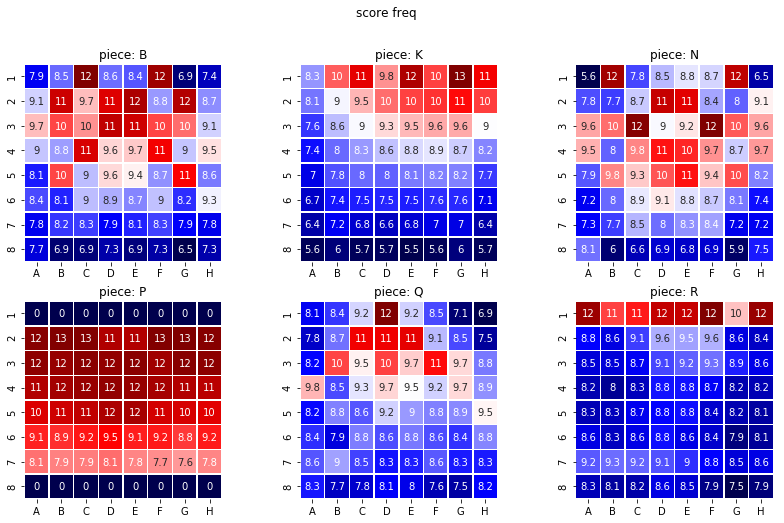

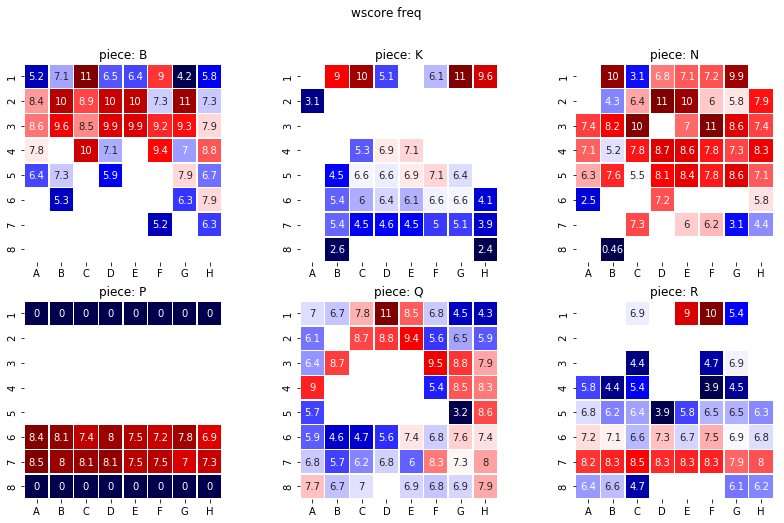

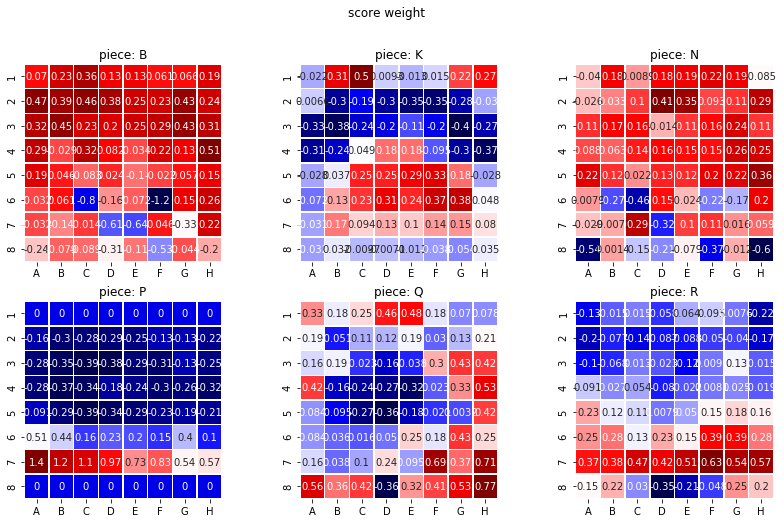

In [114]:
piece_sq_heatmap(regw_sq_df, 'f', 'score freq', True)
piece_sq_heatmap(regw_sq_df, 'fw', 'wscore freq', True)
piece_sq_heatmap(regw_sq_df, 'w','score weight', False)

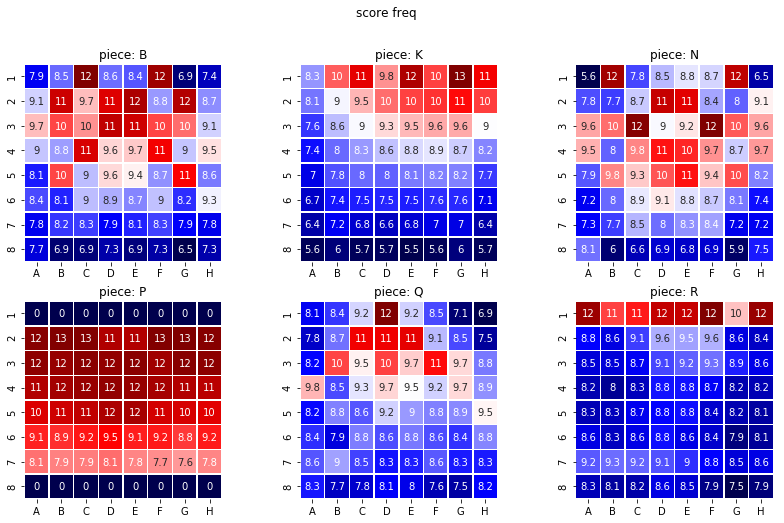

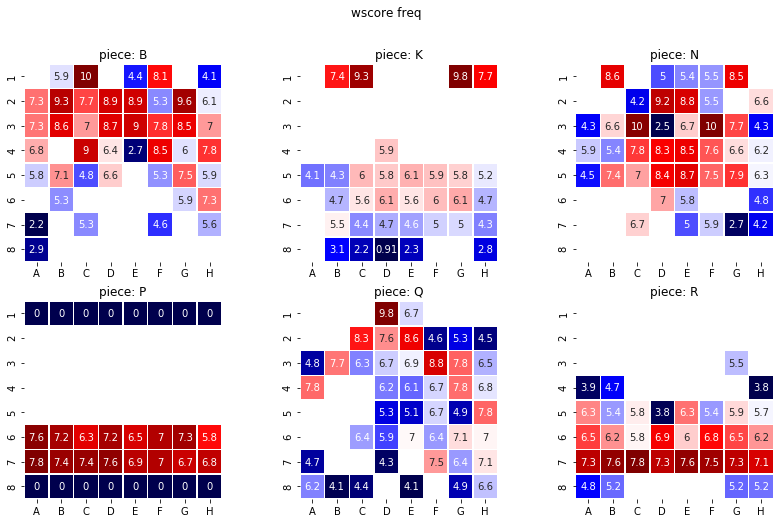

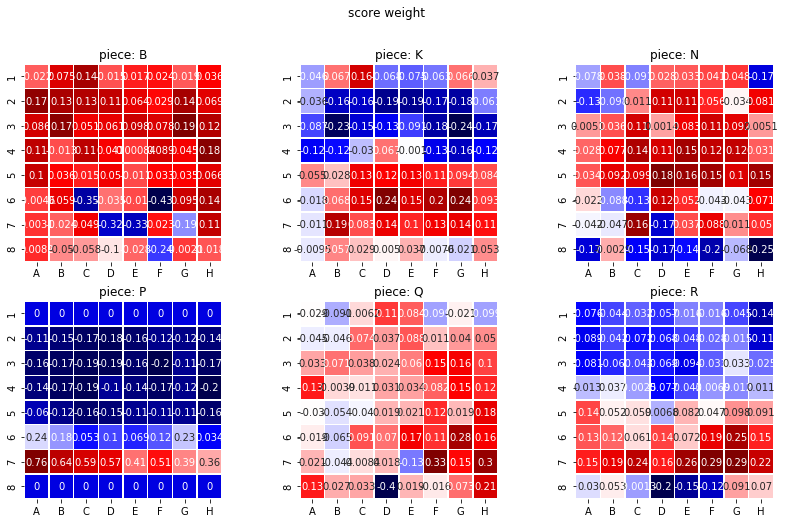

In [115]:
piece_sq_heatmap(regwl2_sq_df, 'f', 'score freq', True)
piece_sq_heatmap(regwl2_sq_df, 'fw', 'wscore freq', True)
piece_sq_heatmap(regwl2_sq_df, 'w','score weight', False)

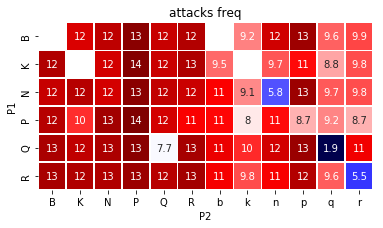

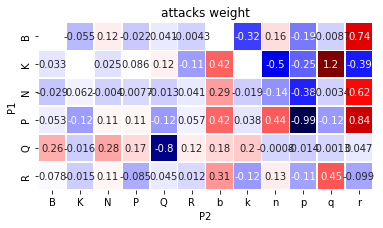

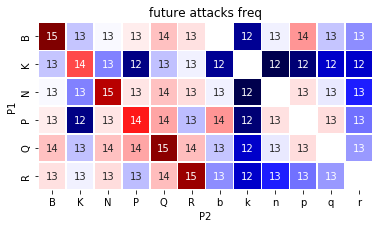

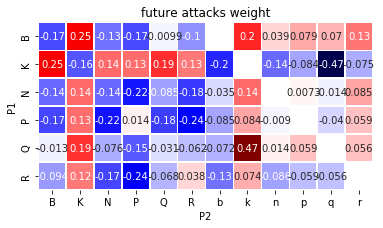

In [116]:
regw_x_df = reg_coef_xtable(regw_df)
regw_f_df = reg_coef_xtable(regw_df,'f')
regwl2_x_df = reg_coef_xtable(regwl2_df)
regwl2_f_df = reg_coef_xtable(regwl2_df,'f')

def piece_x_heatmap(regw_x_df, col, title, log=False):
    fig,ax = plt.subplots()
    val = regw_x_df[col]
    val = np.log(val+1) if log else val
    sns.heatmap(pd.crosstab(regw_x_df['P1'],regw_x_df['P2'],val,aggfunc=np.mean), cmap="seismic", cbar=False, linewidths=0.5, annot=True,square=True, ax=ax)
    ax.set_title(title)

piece_x_heatmap(regw_x_df,'f','attacks freq',True)
piece_x_heatmap(regw_x_df,'w','attacks weight')
piece_x_heatmap(regw_f_df,'f','future attacks freq',True)
piece_x_heatmap(regw_f_df,'w','future attacks weight')

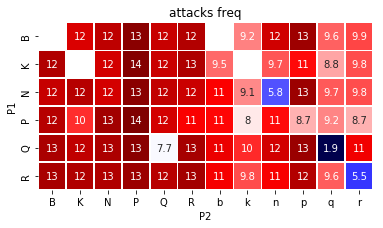

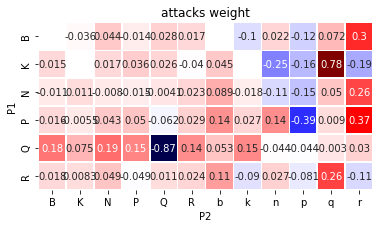

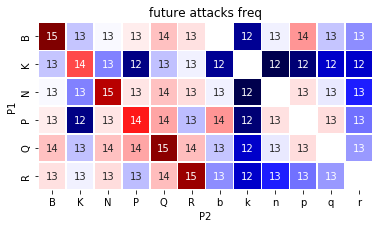

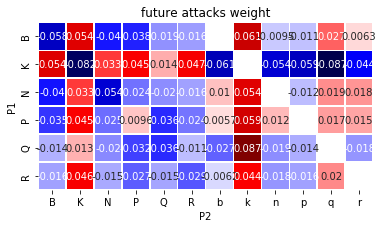

In [117]:
piece_x_heatmap(regwl2_x_df,'f','attacks freq',True)
piece_x_heatmap(regwl2_x_df,'w','attacks weight')
piece_x_heatmap(regwl2_f_df,'f','future attacks freq',True)
piece_x_heatmap(regwl2_f_df,'w','future attacks weight')

In [118]:
wl2cdf.filter(regex='^nv', axis=0)

,-5,-4,-3,-2,-1,0,1,2,3,4,5
nvB,1.585353,2.098986,2.677531,3.316094,3.613750,1.330998,3.770593,3.370395,2.758552,2.091948,1.634647
nvN,1.263974,1.778902,2.253517,2.636749,3.172614,1.299866,3.150577,2.638569,2.222275,1.699886,1.250440
nvP,0.873578,1.354579,1.112295,1.370016,1.278122,0.502405,1.333643,1.338168,1.119429,1.252788,0.848890
nvQ,2.311303,2.601619,3.521535,6.717836,8.736838,6.100089,9.081388,6.924758,3.794633,2.715798,2.146605
nvR,1.801216,1.687363,2.858153,4.776023,5.613584,2.558103,5.478432,4.606445,2.705966,1.804547,1.772526


In [119]:
wdf.filter(regex='^nv', axis=0)

nvP     1.195950
nvN     3.339520
nvB     3.784865
nvR     5.903709
nvQ    10.973818
Name: w, dtype: float64

In [120]:
wl2df.filter(regex='^nv', axis=0)

nvP    0.454317
nvN    1.069373
nvB    1.145491
nvR    1.771093
nvQ    3.108170
Name: wl2, dtype: float64

In [123]:
wdf.filter(regex='^c', axis=0)

cx   -0.415677
cm    0.081889
cs    0.116650
Name: w, dtype: float64

In [124]:
wl2df.filter(regex='^c', axis=0)

cx   -0.137027
cm    0.019521
cs    0.036373
Name: wl2, dtype: float64